In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("train.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='Count'>

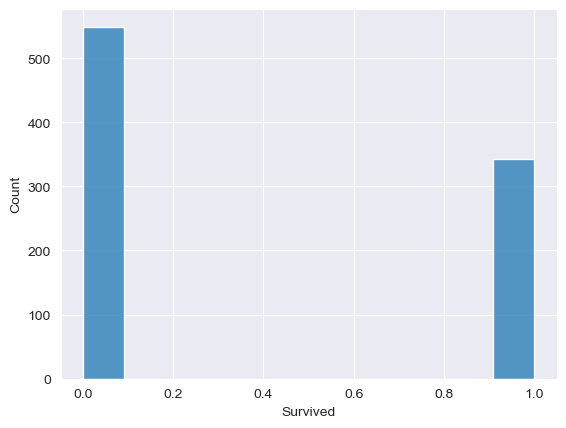

In [9]:
sns.histplot((df['Survived']))

<Axes: ylabel='Count'>

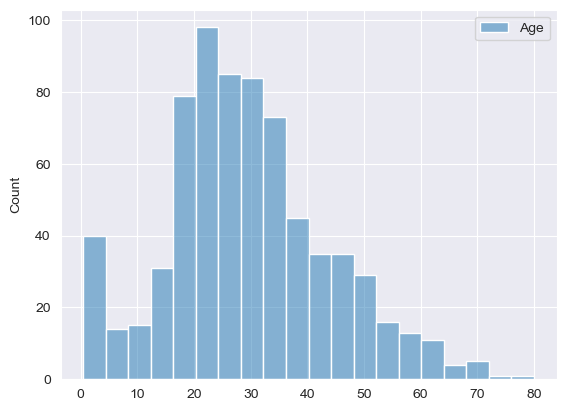

In [14]:
sns.histplot((df['Age'], bin(10),))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x400 with 0 Axes>

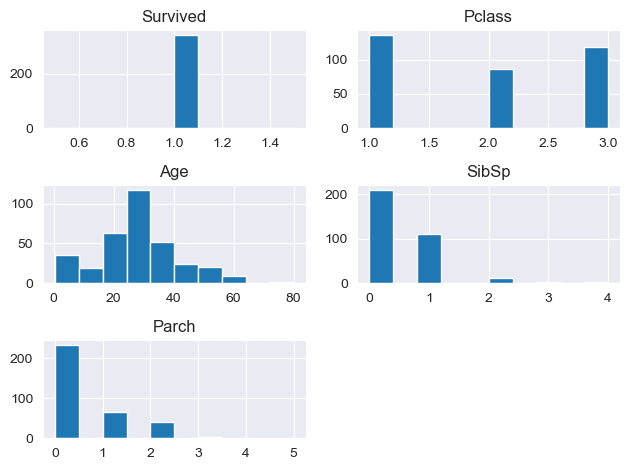

In [42]:
plt.figure(figsize=(10,4))
df[df['Survived'] == 1].hist()
plt.legend()
plt.tight_layout()

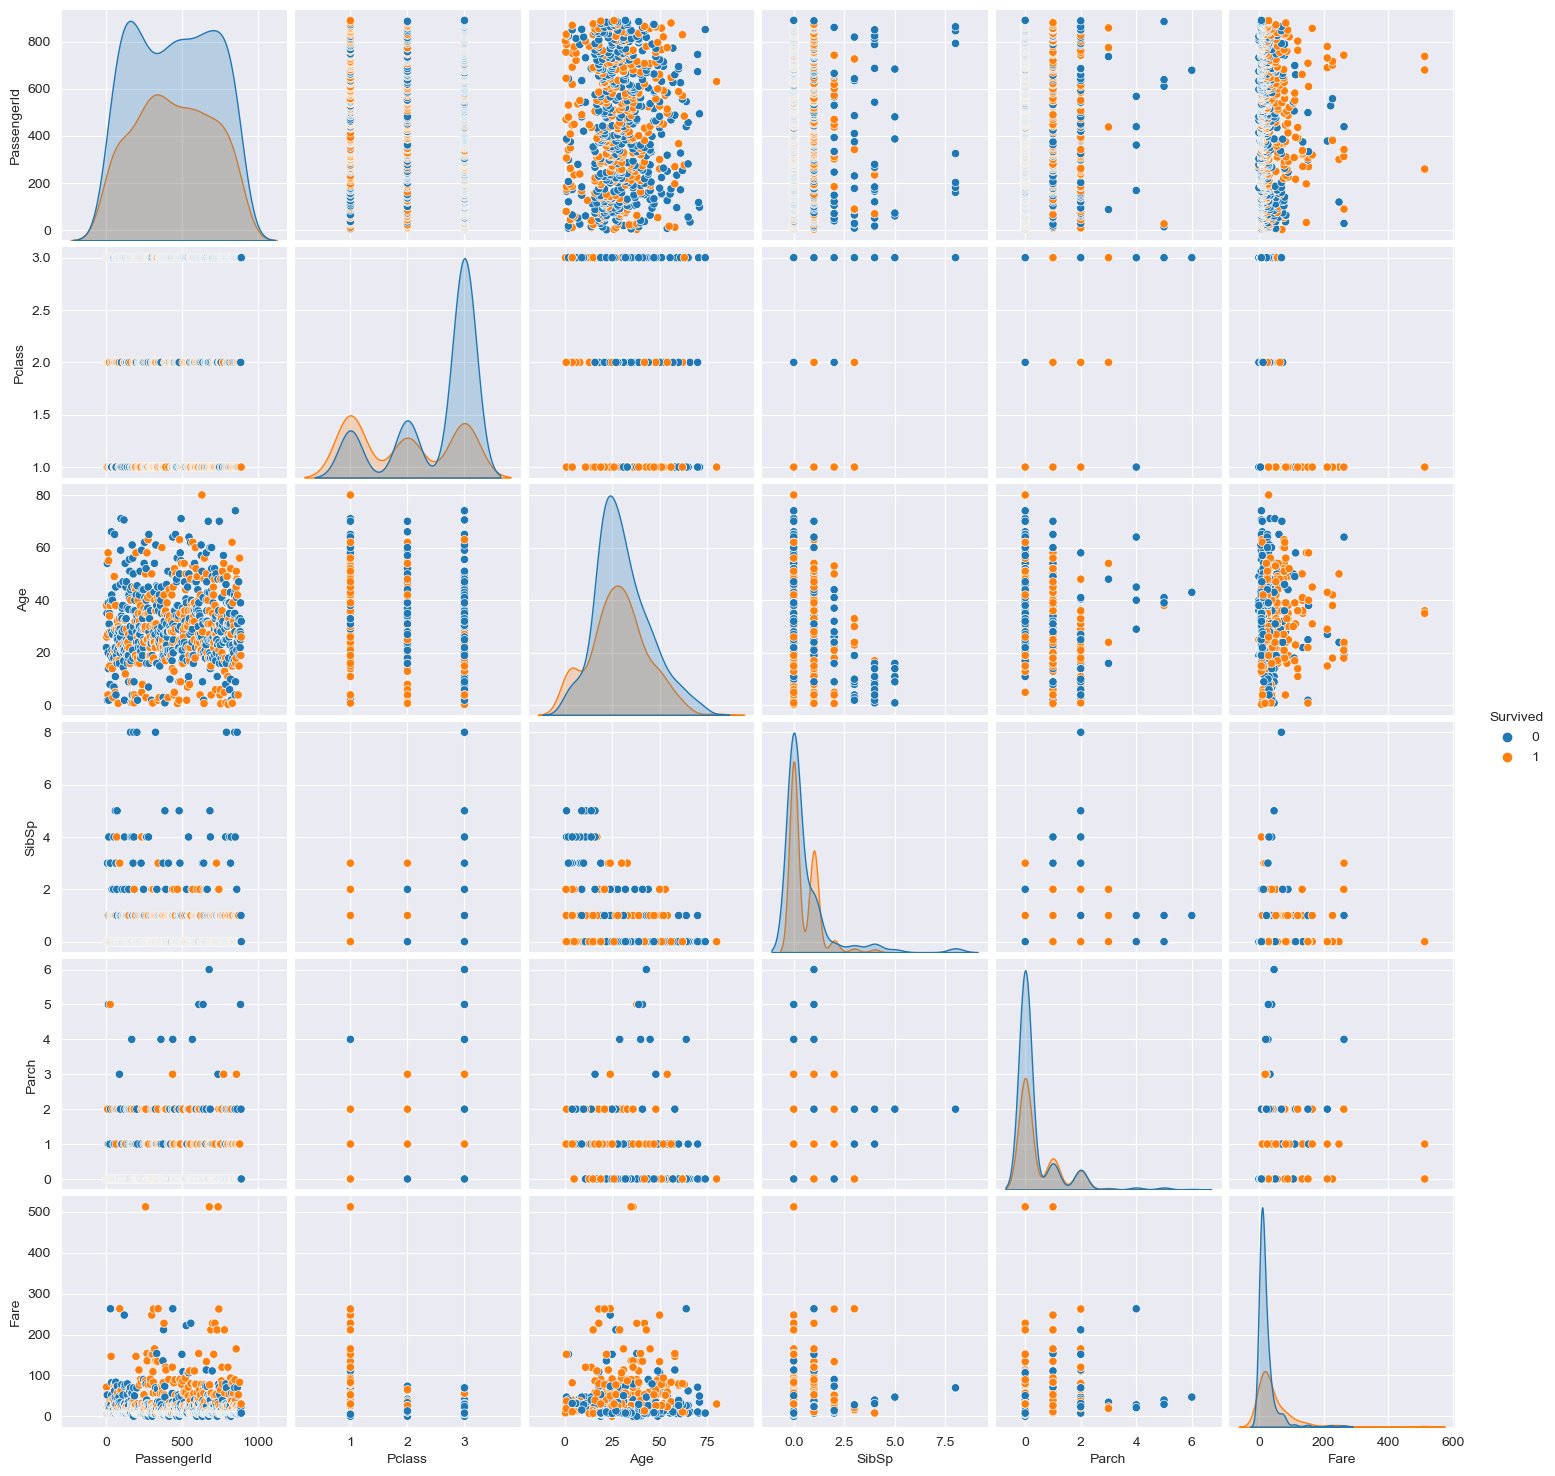

In [16]:
sns.pairplot(data = df, hue="Survived", )

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked' ], axis=1, inplace=True)

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [22]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [23]:
median_value = df['Age'].median()
df['Age'].fillna(median_value, inplace=True)

In [24]:
df.isna().sum().sum()

0

In [25]:
readyData = pd.get_dummies(df, columns=['Sex'], drop_first=True )

In [26]:
readyData

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1
...,...,...,...,...,...,...
886,0,2,27.0,0,0,1
887,1,1,19.0,0,0,0
888,0,3,28.0,1,2,0
889,1,1,26.0,0,0,1


In [27]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(readyData.drop('Survived', axis=1), readyData['Survived'],test_size=.25, random_state=21)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
model = RandomForestClassifier(n_estimators=200)

In [67]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [68]:
outcome = model.predict(x_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
print(classification_report(y_test, outcome))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       133
           1       0.84      0.69      0.76        90

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



In [71]:
print(confusion_matrix(y_test,outcome))

[[121  12]
 [ 28  62]]


In [80]:
all_combination = {'n_estimators':[120,150, 70, 200, 300], 'max_depth':[20, 140,40, 70]}

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=all_combination, verbose=3)

In [83]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....max_depth=20, n_estimators=120;, score=0.791 total time=   0.4s
[CV 2/5] END ....max_depth=20, n_estimators=120;, score=0.791 total time=   0.3s
[CV 3/5] END ....max_depth=20, n_estimators=120;, score=0.858 total time=   0.5s
[CV 4/5] END ....max_depth=20, n_estimators=120;, score=0.797 total time=   0.3s
[CV 5/5] END ....max_depth=20, n_estimators=120;, score=0.789 total time=   0.2s
[CV 1/5] END ....max_depth=20, n_estimators=150;, score=0.784 total time=   0.3s
[CV 2/5] END ....max_depth=20, n_estimators=150;, score=0.784 total time=   0.3s
[CV 3/5] END ....max_depth=20, n_estimators=150;, score=0.858 total time=   0.3s
[CV 4/5] END ....max_depth=20, n_estimators=150;, score=0.805 total time=   0.3s
[CV 5/5] END ....max_depth=20, n_estimators=150;, score=0.774 total time=   0.3s
[CV 1/5] END .....max_depth=20, n_estimators=70;, score=0.799 total time=   0.1s
[CV 2/5] END .....max_depth=20, n_estimators=70

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 140, 40, 70],
                         'n_estimators': [120, 150, 70, 200, 300]},
             verbose=3)

In [84]:
grid.best_params_

{'max_depth': 40, 'n_estimators': 70}

In [88]:
advanced_output = grid.predict(x_test)

In [90]:
print(classification_report(y_test,advanced_output))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       133
           1       0.83      0.69      0.75        90

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.80       223
weighted avg       0.82      0.82      0.81       223



In [91]:
print(confusion_matrix(y_test,advanced_output))

[[120  13]
 [ 28  62]]
